In [1]:
"""
Date:20-01-2022
Name: Vamshikrishna Domala
FBProphet: Anomaly detection
VIX S&P 500 Futures
"""

'\nDate:20-01-2022\nName: Vamshikrishna Domala\nFBProphet: Anomaly detection\nVIX S&P 500 Futures\n'

In [2]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
dataframe=pd.read_csv("S&P 500 VIX Futures.csv")

In [4]:
dataframe['Date']=pd.to_datetime(dataframe['Date'])

In [5]:
dataframe=dataframe.rename(columns={"Date":"ds","Open":"y"})

In [6]:
dataframe

ds  Price      y   High    Low    Vol.  Change   %
0    2010-01-01  23.02  23.02  23.02  23.02       -   0.00% NaN
1    2010-01-04  22.08  23.02  23.02  22.08       -  -4.13% NaN
2    2010-01-05  21.52  22.08  22.33  21.52       -  -2.49% NaN
3    2010-01-06  20.92  21.52  21.67  20.92       -  -2.79% NaN
4    2010-01-07  20.38  20.92  21.23  20.38       -  -2.63% NaN
...         ...    ...    ...    ...    ...     ...     ...  ..
3133 2022-01-16  21.83  19.68  21.83  19.68       -  11.00% NaN
3134 2022-01-17  21.83  21.88  22.18  21.68       -   0.00% NaN
3135 2022-01-18  22.62  19.70  22.90  19.45  79.85K   3.62% NaN
3136 2022-01-19  22.79  22.45  23.50  21.70   1.25K   0.75% NaN
3137 2022-01-20  23.53  24.08  24.18  23.43       -   3.25% NaN

[3138 rows x 8 columns]

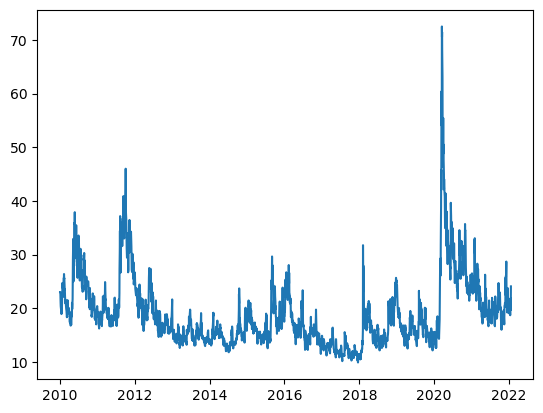

In [7]:
plt.plot(dataframe['ds'],dataframe['y'])
plt.show()

In [8]:
df_no_weekdays=dataframe[dataframe['ds'].dt.dayofweek<5]

In [9]:
model = Prophet(interval_width=0.95,
                growth = 'linear',seasonality_mode='multiplicative', yearly_seasonality=10,weekly_seasonality=10, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5,fourier_order=10 )
model.add_country_holidays(country_name='US')

In [10]:
model.fit(dataframe)

In [11]:
future=model.make_future_dataframe(periods=275, freq='B') 

In [12]:
df_no_weekdays=future[future['ds'].dt.dayofweek<5]

In [13]:
prediction=model.predict(future)
prediction['fact']=dataframe['y'].reset_index(drop=True)

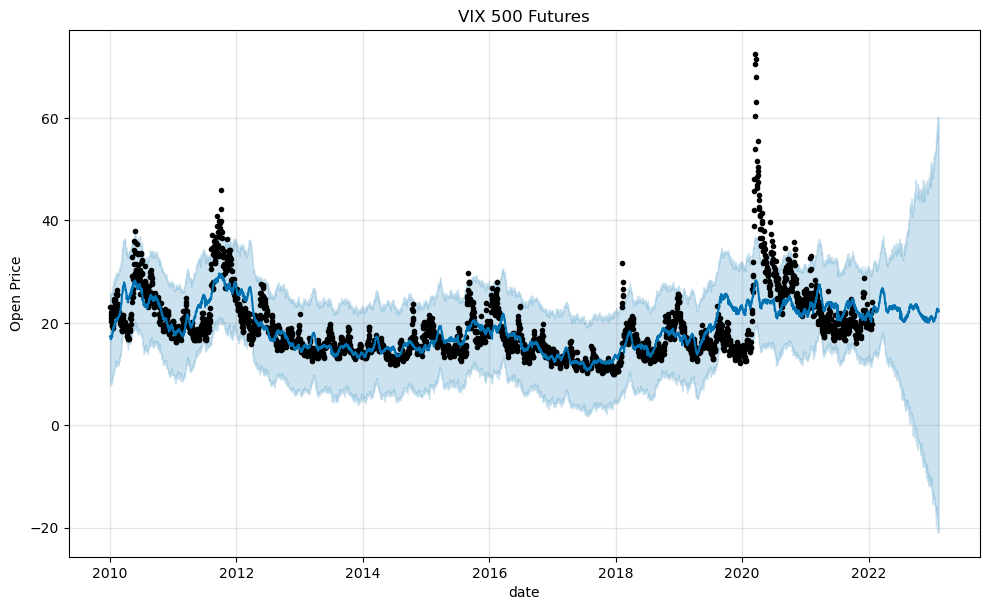

In [14]:
model.plot(prediction) #plotting

plt.title("VIX 500 Futures")
plt.xlabel("date")
plt.ylabel("Open Price")
plt.show()

In [15]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3408 2023-02-03  22.683171  -20.284241   57.758700
3409 2023-02-06  22.628677  -21.009912   58.433168
3410 2023-02-07  22.627292  -19.461459   60.241017
3411 2023-02-08  22.135443  -19.270611   58.818866
3412 2023-02-09  22.289693  -20.721438   59.125514

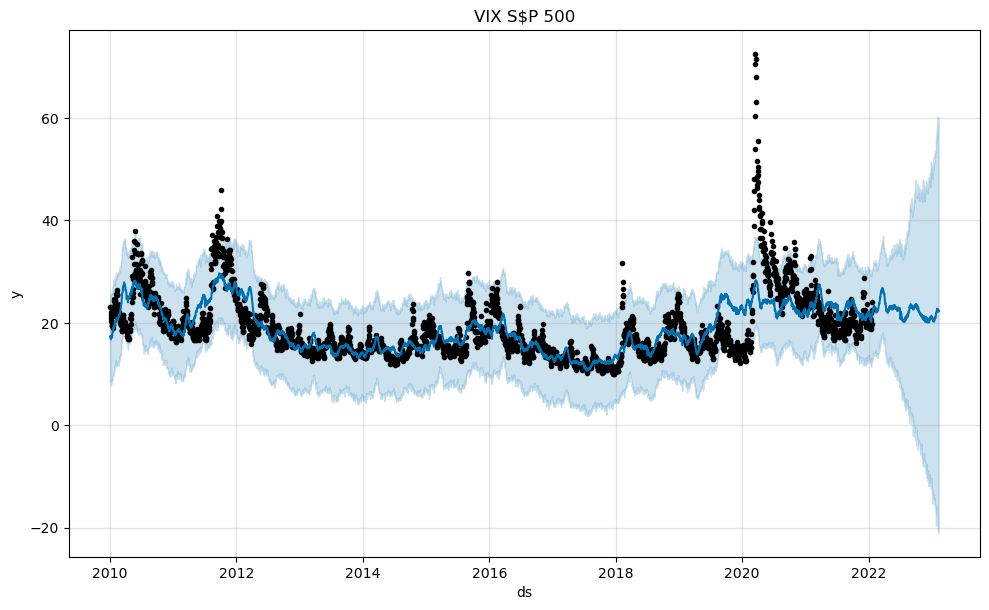

In [16]:
result = pd.concat([dataframe.set_index('ds')['y'], prediction.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = model.plot(prediction)
plt.title('VIX S$P 500')
plt.show()

C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Domala\.conda\envs\Deep_learning\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


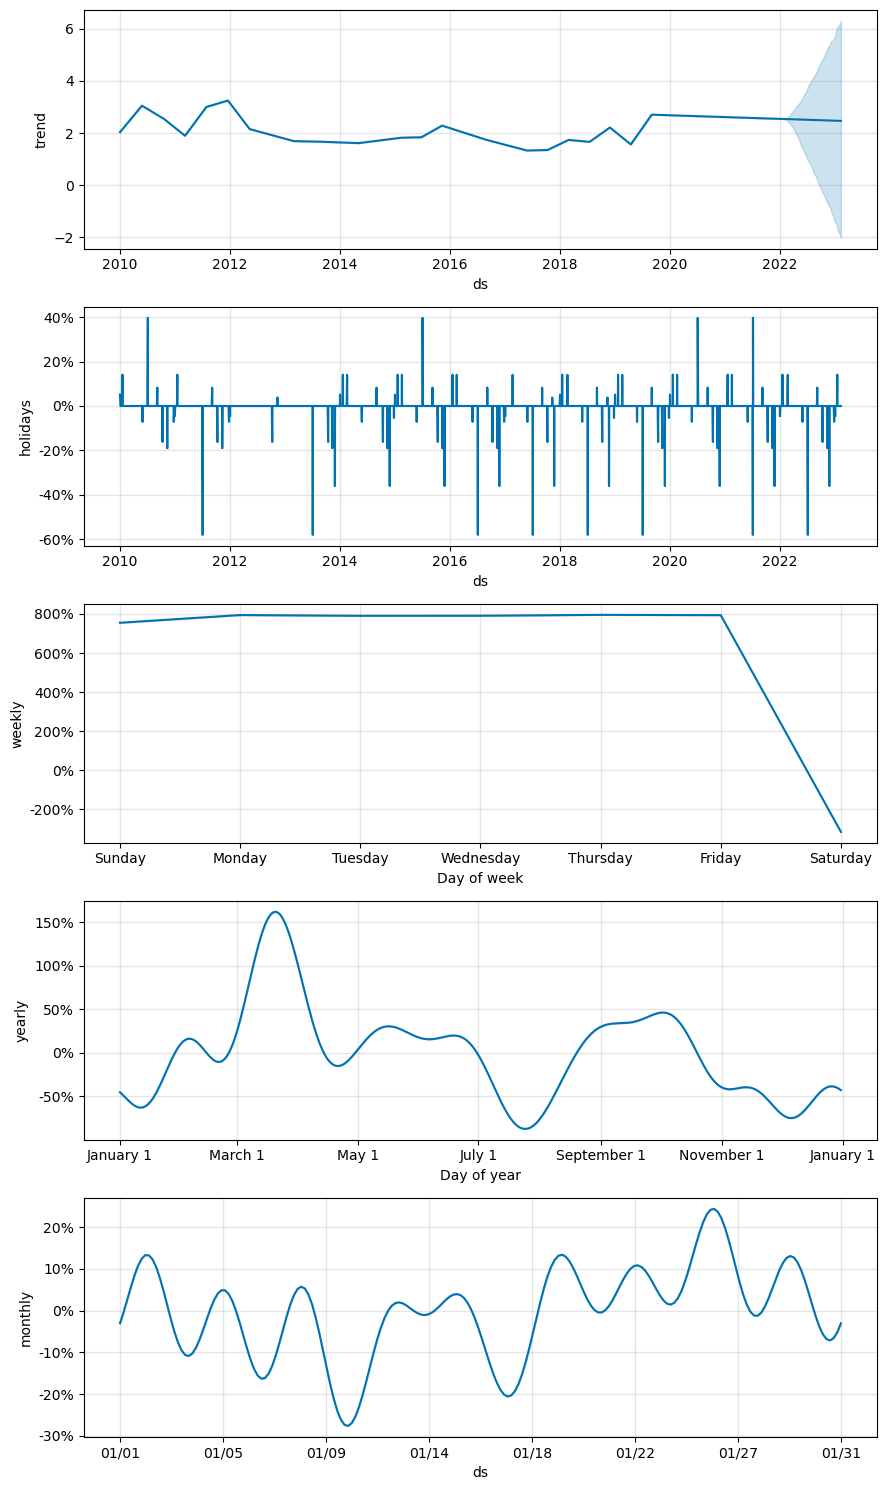

In [17]:
comp = model.plot_components(prediction)
plt.show()

In [18]:
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [19]:
result[result['error'].abs()>0.4*result['uncertainty']]

y       yhat  yhat_lower  yhat_upper     error  uncertainty
ds                                                                         
2010-03-12  18.42  25.715747   16.985269   34.825516 -7.295747    17.840246
2010-03-18  19.95  27.015619   18.255620   35.833163 -7.065619    17.577543
2010-03-19  20.13  27.203255   18.547752   35.550547 -7.073255    17.002795
2010-03-22  20.08  27.571424   18.708502   35.592349 -7.491424    16.883847
2010-03-23  19.88  27.894950   18.963300   36.452522 -8.014950    17.489222
...           ...        ...         ...         ...       ...          ...
2021-01-28  32.70  23.497598   14.893803   32.185137  9.202402    17.291334
2021-02-01  33.05  23.897565   15.267482   32.343943  9.152435    17.076461
2021-03-17  19.80  27.067879   17.939581   35.314882 -7.267879    17.375301
2021-06-14  16.65  23.389320   15.211858   31.735029 -6.739320    16.523171
2021-12-06  28.70  21.053415   11.636616   29.645031  7.646585    18.008415

[304 rows x 6 columns]

In [20]:
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 0.4*x['uncertainty']) else 'No', axis = 1)
#result['anomaly'] = np.where(np.abs(x['error']) > 1.5*x['uncertainty']), 'Yes', 'No') #Alternate way

In [21]:
#visualize the anomaly data
import plotly.express as px
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='VIX 500 Futures')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=2, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(count=2, label='3y', step="year", stepmode="backward"),
              dict(count=2, label='6y', step="year", stepmode="todate"),
              dict(step="all")
        ])
    )
)
fig.show()

In [22]:
import plotly.express as px
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='VIX 500 Futures')


fig.show()

In [23]:
prediction

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-01-01  2.034912    8.345647   25.611966     2.034912     2.034912   
1    2010-01-04  2.055787    8.690405   25.546131     2.055787     2.055787   
2    2010-01-05  2.062745    7.740705   25.200865     2.062745     2.062745   
3    2010-01-06  2.069703    8.156969   25.732019     2.069703     2.069703   
4    2010-01-07  2.076661    8.771248   25.797260     2.076661     2.076661   
...         ...       ...         ...         ...          ...          ...   
3408 2023-02-03  2.468463  -20.284241   57.758700    -1.910485     6.184283   
3409 2023-02-06  2.467892  -21.009912   58.433168    -1.958951     6.214422   
3410 2023-02-07  2.467702  -19.461459   60.241017    -1.977961     6.243069   
3411 2023-02-08  2.467512  -19.270611   58.818866    -1.996972     6.271715   
3412 2023-02-09  2.467322  -20.721438   59.125514    -2.015982     6.300362   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0               0.0                  0.0                  0.0   
1               0.0                  0.0                  0.0   
2               0.0                  0.0                  0.0   
3               0.0                  0.0                  0.0   
4               0.0                  0.0                  0.0   
...             ...                  ...                  ...   
3408            0.0                  0.0                  0.0   
3409            0.0                  0.0                  0.0   
3410            0.0                  0.0                  0.0   
3411            0.0                  0.0                  0.0   
3412            0.0                  0.0                  0.0   

      Christmas Day (Observed)  ...  weekly_lower  weekly_upper    yearly  \
0                          0.0  ...      7.937174      7.937174 -0.446811   
1                          0.0  ...      7.943453      7.943453 -0.512918   
2                          0.0  ...      7.904098      7.904098 -0.535746   
3                          0.0  ...      7.908177      7.908177 -0.557652   
4                          0.0  ...      7.953422      7.953422 -0.577837   
...                        ...  ...           ...           ...       ...   
3408                       0.0  ...      7.937174      7.937174  0.142251   
3409                       0.0  ...      7.943453      7.943453  0.161958   
3410                       0.0  ...      7.904098      7.904098  0.156387   
3411                       0.0  ...      7.908177      7.908177  0.145340   
3412                       0.0  ...      7.953422      7.953422  0.129399   

      yearly_lower  yearly_upper  additive_terms  additive_terms_lower  \
0        -0.446811     -0.446811             0.0                   0.0   
1        -0.512918     -0.512918             0.0                   0.0   
2        -0.535746     -0.535746             0.0                   0.0   
3        -0.557652     -0.557652             0.0                   0.0   
4        -0.577837     -0.577837             0.0                   0.0   
...            ...           ...             ...                   ...   
3408      0.142251      0.142251             0.0                   0.0   
3409      0.161958      0.161958             0.0                   0.0   
3410      0.156387      0.156387             0.0                   0.0   
3411      0.145340      0.145340             0.0                   0.0   
3412      0.129399      0.129399             0.0                   0.0   

      additive_terms_upper       yhat   fact  
0                      0.0  17.347111  23.02  
1                      0.0  17.403592  23.02  
2                      0.0  16.845584  22.08  
3                      0.0  16.768951  21.52  
4                      0.0  17.295226  20.92  
...                    ...        ...    ...  
3408                   0.0  22.683171    NaN  
3409                   0.0  22.628677    NaN  
3410                   0.0  22.627292    NaN  

In [24]:
import plotly.express as px
fig = px.scatter(result.reset_index(), x=prediction['ds'], y=prediction['yhat_lower'], title='VIX 500 Futures')


In [25]:
prediction1=prediction[['ds','yhat_upper','yhat_lower','yhat']]

In [26]:
fig = px.scatter(prediction1, x='ds', y=prediction1.columns, title='VIX 500 Futures')
fig.show()